# First simulations with the model BRAID-Acq

## 1. Behavioral effects
### A. Simulation of the word length effect for known words and novel words

The length effect refers to the fact that longer words may take more time to process than shorter words.
Studies in children suggest that this effect tends to decrease early in the reading learning process.
In Italian children with 1, 2, or 3 years of reading experience, a clear change in the length effect is observed between the first and second year of learning (Zoccolotti et al., 2005).
A similar rapid change is found in English after the second year of learning in a categorization task (Samuels et al., 1978).
A pronounced length effect indicates the use of a purely serial procedure as opposed to a parallel one (Zoccolotti et al., 2005).
In the context of dual-route models, this opposition between serial and parallel is often interpreted as a distinction between sublexical and lexical processing.
However, it has been shown that a high length effect on known words can be generated by increasing inter-letter spacing (Risko et al., 2011).
Similarly, an effect of word length is observed in children, despite evidence against the use of a sublexical procedure (van den Boer et al., 2012).
The origin of the length effect may be related to visual processing of the stimulus (van den Boer et al., 2012).
The structure of the BRAID model allows us to explore this idea, especially through implemented visual attention processes.

### B. Simulation of the lexicality effect
The lexicality effect refers to the difference in processing between real words and non-words.
In terms of reading times, it has been showed that real words are recognized more quickly and accurately than non-words,
even from the beginning stages of reading acquisition (sprenger-charolles, 2005).
This underscores the importance of lexical knowledge in the reading process.
In dual-route models, the lexicality effect arises from the differing procedures employed for reading novel and familiar words.
When decoding novel words, grapheme-phoneme conversions are used, a relatively slower process, whereas the recognition of known words relies on a faster direct recognition mechanism.
In the BRAID-Acq model, a single procedure is implemented for both known and novel words.
However, the model incorporates top-down lexical feedback, which accelerates letter recognition during the reading of known words, leading to reduced reading times.


## 2. Informatic implementation for the reproduction of the 2 effects

The 2 effects will be assessed using the same simulation. Code will be divided in several parts, see further explanations below:

* A - Imports, to be adapted at each simulation with specific libraries, but the first part (before specific libraries) is the same for every simulation

In [1]:

#######################
### A - Imports ######
######################

braidPath = "../"
import sys
sys.path.append(braidPath)

from braidpy.simu import simu
from braidpy.expe import expe

# specific libraries
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np


* B - Model init, see the notebook one_word.ipynb in the same directory for more explanations

In [2]:
#######################
### B - Model init ####
######################

def simu_definition(novel=True):
    simu_param={"level":"expe","max_iter":2000, "t_min":50, "simu_type":"H", "thr_expo":0.1, "stop_criterion_type":"pMean", "serial_reading":False}
    simu_args={}
    model_param={"langue":"fr", "path":braidPath}
    ortho_param = {"stim":"partir","learning":False, "remove_stim":novel,"sd":1, 'Q':1}
    phono_param = {"learning":False, "remove_stim":False}
    semantic_param = {"context_sem":True,"p_sem":5,"N_sem":2}
    sim = simu(model_param, ortho_param, phono_param, semantic_param, simu_args, **simu_param)
    return sim

# simulation for orthographically novel words
sim_novel=simu_definition(True)

# simulation for orthographically known words
sim_known=simu_definition(False)



* C - Experiment init
    * liste : should be a list of words. If not provided, words are selected randomly.
    * lenMin, lexMax, n_stim_len : if random selection (i.e. liste not provided), selects n_stim_len random words per word length, between lenMin and lenMax, both included.
    * res_fct_name : the name of the result function, see simu documentation for more details about authorized names. Here are some examples:
        * t_tot : total reading time
        * phi : the decoded pronunciation
        * wphi : the phonological identified word
        * wl : the orthographic identified word
        * wfusion : the word identified overall
    * basename : the name of the file to save results.
        * Results will be saved in csv and pkl format.
        * basename will be completed with an extension accoding to the model's knowledge of the word:
            * PM_X : known in both modalities
            * PM_O : novel in the ortho modality
            * PM_P : novel in the phono modality
            * PM_OP : novel in both modalities
    * n_expo : int. number of exposures for each stimulus.
    * test : dictionary, with keys the names of the parameters, and values the values to be tested for each parameter. Specific parameters you want to test the influence on results. The cross product of all parameters will be tested.
        * ex : test={"context_sem":[False,True],"max_iter":[500,1000,1500]} -> the 6 combination values will be tested.

In [3]:
#######################
### C - Expe init ####
######################

expe_param = {"res_fct_name":["t_tot"],
              "basename":"first_simulation",
              "n_expo":1,
              "test":{"context_sem":[False]},
              "liste":None,
              "lenMin":4,"lenMax":8,"n_stim_len":5}


* D - Experiment simulation
    * you must pass the dictionary of experiment parameters to the class constructor.
    * the function to call is "compare_param" because usually several parameters and their influence on results are compared, through the dictionary called "test".
        * if there is no comparison of parameters, put one parameter with one value, like test={"context_sem":True}

In [4]:
#######################
### D - Simulations ##
#####################print(df.head(50))#

### Conducting the simulation on novel words
exp = expe(simu=sim_novel,**expe_param)
exp.compare_param()

### Conducting the simulation on known words
exp = expe(simu=sim_known,**expe_param)
exp.compare_param()


EXPE:root:['ruse', 'keuf', 'casa', 'lobe', 'issu', 'fonds', 'baffe', 'shoot', 'essai', 'cette', 'assagi', 'damner', 'raquer', 'tocsin', 'voyeur', 'briseur', 'dessert', 'haleine', 'caniche', 'repérer', 'abstenir', 'organisé', 'échéance', 'porphyre', 'naufrage'] 
 csv/first_simulation_PM_O.csv
EXPE:root:briseur 15/25
EXPE:root:dessert 16/25
EXPE:root:haleine 17/25
EXPE:root:caniche 18/25
EXPE:root:repérer 19/25
EXPE:root:abstenir 20/25
EXPE:root:organisé 21/25
EXPE:root:échéance 22/25
EXPE:root:porphyre 23/25
EXPE:root:naufrage 24/25
EXPE:root:['ruse', 'keuf', 'casa', 'lobe', 'issu', 'fonds', 'baffe', 'shoot', 'essai', 'cette', 'assagi', 'damner', 'raquer', 'tocsin', 'voyeur', 'briseur', 'dessert', 'haleine', 'caniche', 'repérer', 'abstenir', 'organisé', 'échéance', 'porphyre', 'naufrage'] 
 csv/first_simulation_PM_X.csv
EXPE:root:ruse 0/25


end of expe


EXPE:root:keuf 1/25
EXPE:root:casa 2/25
EXPE:root:lobe 3/25
EXPE:root:issu 4/25
EXPE:root:fonds 5/25
EXPE:root:baffe 6/25
EXPE:root:shoot 7/25
EXPE:root:essai 8/25
EXPE:root:cette 9/25
EXPE:root:assagi 10/25
EXPE:root:damner 11/25
EXPE:root:raquer 12/25
EXPE:root:tocsin 13/25
EXPE:root:voyeur 14/25
EXPE:root:briseur 15/25
EXPE:root:dessert 16/25
EXPE:root:haleine 17/25
EXPE:root:caniche 18/25
EXPE:root:repérer 19/25
EXPE:root:abstenir 20/25
EXPE:root:organisé 21/25
EXPE:root:échéance 22/25
EXPE:root:porphyre 23/25
EXPE:root:naufrage 24/25


end of expe


* E - Results
    * The results are csv files, with columns:
        * word : name if the stimulus
        * t : time (exposure or iteration, according to the simulation)
        * num : for results of length >1, the num-th item of the result
        * some other params : the params that are keys of dictionary "test" in the expe configuration
        * success : if it has a meaning, success of the result
        * error_type : if it has a meaning, type of error made by the model
    * To exploit the results, the csv has to be extracted for the 2 simulations (novel and known word).
    Then a unique dataframe is constructed using those 2 dataframes, and results are plotted using pandas.

([<matplotlib.axis.XTick at 0x7feddc8291c0>,
 [Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8')])

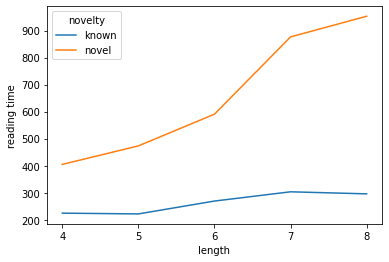

In [6]:
#######################
### E - Results ######
######################

df_known=pd.read_csv('csv/first_simulations_PM_X.csv')
df_novel=pd.read_csv('csv/first_simulations_PM_O.csv')

# creating a unique dataframe with length and novelty info
df_known['length']=df_known.word.str.len()
df_known['novelty']='known'
df_novel['length']=df_novel.word.str.len()
df_novel['novelty']='novel'
df=pd.concat([df_known,df_novel])[['value','length','novelty','word']]


# plot

pivot_df = df[['length','novelty','value']].groupby(['length','novelty']).mean().reset_index().pivot(index='length', columns='novelty', values='value')
pivot_df.plot(ylabel="reading time")
plt.xticks(range(4,9))


